In [1]:
import pandas as pd
import glob
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from utils import *

# Functions

In [2]:
tool_list=["optitype","arcas","rna2hla","hlaforest","seq2hla","hlahd","phlat","hlavbseq",'hlaminer']

missed_alleles = []

for t in tool_list:
    missed_alleles_caller = []
    for i in range(1,7):
        gs=pd.read_csv(f"../datasets/{i}_gs.csv")
        pre=pd.read_csv(f"../results/standard/{t}_d{i}.csv")
    
        ret = get_inaccurate_and_all_alleles(pre,gs)
        missed_alleles_caller.append(ret[0])
    missed_alleles.append(missed_alleles_caller)



In [3]:
mis_total = []
all_total = np.array([1084, 1080, 1088, 1180, 980]) #5 element vector with # of gold standard A, B, C, DRB, and DQB

for tool in missed_alleles:
    mis_counts = [0,0,0,0,0]
    for d in tool:
        for allele in d:
            if allele[0] == "A":
                mis_counts[0]+=1
            if allele[0] == "B":
                mis_counts[1] += 1
            if allele[0] == 'C':
                mis_counts[2] += 1
            if allele[0:2] == 'DR':
                mis_counts[3] += 1
            if allele[0:2] == 'DQ':
                mis_counts[4] += 1
    mis_total.append(mis_counts)

percentage = mis_total/all_total
print(percentage)
accuracy = 1-percentage
print(accuracy)

[[0.00276753 0.01018519 0.00367647 0.         0.        ]
 [0.01383764 0.01481481 0.01470588 0.02627119 0.00306122]
 [0.00369004 0.0212963  0.02022059 0.06779661 0.        ]
 [0.01476015 0.07592593 0.01286765 0.02457627 0.02653061]
 [0.00369004 0.0212963  0.02022059 0.10254237 0.07040816]
 [0.06549815 0.05092593 0.05606618 0.06355932 0.06326531]
 [0.00830258 0.05833333 0.02481618 0.02457627 0.39591837]
 [0.08210332 0.11388889 0.09558824 0.88220339 0.95714286]
 [0.78413284 0.85555556 0.77297794 0.7779661  0.56938776]]
[[0.99723247 0.98981481 0.99632353 1.         1.        ]
 [0.98616236 0.98518519 0.98529412 0.97372881 0.99693878]
 [0.99630996 0.9787037  0.97977941 0.93220339 1.        ]
 [0.98523985 0.92407407 0.98713235 0.97542373 0.97346939]
 [0.99630996 0.9787037  0.97977941 0.89745763 0.92959184]
 [0.93450185 0.94907407 0.94393382 0.93644068 0.93673469]
 [0.99169742 0.94166667 0.97518382 0.97542373 0.60408163]
 [0.91789668 0.88611111 0.90441176 0.11779661 0.04285714]
 [0.21586716 

# Plots

In [4]:
df = pd.DataFrame(mis_total)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = tool_list
df

,A,B,C,DRB1,DQB1
optitype,3,11,4,0,0
arcas,15,16,16,31,3
rna2hla,4,23,22,80,0
hlaforest,16,82,14,29,26
seq2hla,4,23,22,121,69
hlahd,71,55,61,75,62
phlat,9,63,27,29,388
hlavbseq,89,123,104,1041,938
hlaminer,850,924,841,918,558


In [5]:
df = pd.DataFrame(percentage)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = tool_list
df

,A,B,C,DRB1,DQB1
optitype,0.002768,0.010185,0.003676,0.000000,0.000000
arcas,0.013838,0.014815,0.014706,0.026271,0.003061
rna2hla,0.003690,0.021296,0.020221,0.067797,0.000000
hlaforest,0.014760,0.075926,0.012868,0.024576,0.026531
seq2hla,0.003690,0.021296,0.020221,0.102542,0.070408
hlahd,0.065498,0.050926,0.056066,0.063559,0.063265
phlat,0.008303,0.058333,0.024816,0.024576,0.395918
hlavbseq,0.082103,0.113889,0.095588,0.882203,0.957143
hlaminer,0.784133,0.855556,0.772978,0.777966,0.569388


<AxesSubplot:>

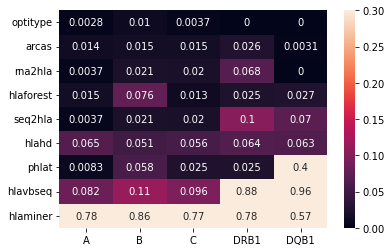

In [6]:
df = pd.DataFrame(percentage)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = tool_list
df

from matplotlib.colors import LogNorm, Normalize
sns.heatmap(df,annot=True,vmin=0,vmax=0.3)

<AxesSubplot:>

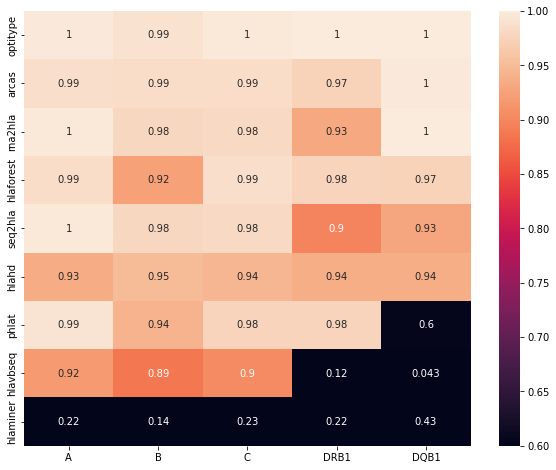

In [7]:
df = pd.DataFrame(accuracy)
df.columns = ['A','B','C','DRB1','DQB1']
df.index = tool_list
df

from matplotlib.colors import LogNorm, Normalize
plt.figure(figsize=(10,8))
sns.heatmap(df,annot=True,vmin=0.6,vmax=1)